In [1]:
!pip install sklearn --upgrade
!pip install joblib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Requirement already up-to-date: sklearn in /Users/michellefitzpatrick/anaconda3/lib/python3.7/site-packages (0.0)


In [2]:
nd = pd.read_csv("numeric_data.csv")
numeric_data = nd.drop(columns="Unnamed: 32")
numeric_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
numeric_data['diagnosis_num'] =  numeric_data['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
numeric_data.columns
numeric_data = numeric_data[['id', 'diagnosis', 'diagnosis_num', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

numeric_data.head()

,id,diagnosis,diagnosis_num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
numeric_only = numeric_data.drop('diagnosis', axis=1)

In [5]:
numeric_df = pd.DataFrame(numeric_only)
numeric_df.head()

,id,diagnosis_num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
target = numeric_df['diagnosis_num']
data = numeric_df.drop('diagnosis_num', axis=1)
features = data.columns

In [7]:
# EDA 
total_count_tumors = len(numeric_data)
print(total_count_tumors)
total_count_benign = (numeric_data.diagnosis == 'B').sum()
print(total_count_benign)
total_count_malignant = (numeric_data.diagnosis == 'M').sum()
print(total_count_malignant)
print("-----")
percent_benign = (total_count_benign/total_count_tumors)*100.00
percent_malignant = (total_count_malignant/total_count_tumors)*100.00
print(percent_benign)
print(percent_malignant)

569
357
212
-----
62.741652021089635
37.258347978910365


In [8]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
features.shape

(31,)

In [10]:
#Check for Null Values
numeric_df.isnull().sum().sort_values()

id                         0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
diagnosis_num              0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [34]:
# Feature Key
# se = standard_error; worst = "worst" or largest mean value; 

from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(k=31)
fit = bestfeatures.fit(data, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(31,'Score')) 

                    Feature       Score
28     concave points_worst  964.385393
23          perimeter_worst  897.944219
8       concave points_mean  861.676020
21             radius_worst  860.781707
3            perimeter_mean  697.235272
24               area_worst  661.600206
1               radius_mean  646.981021
4                 area_mean  573.060747
7            concavity_mean  533.793126
27          concavity_worst  436.691939
6          compactness_mean  313.233079
26        compactness_worst  304.341063
11                radius_se  268.840327
13             perimeter_se  253.897392
14                  area_se  243.651586
22            texture_worst  149.596905
25         smoothness_worst  122.472880
29           symmetry_worst  118.860232
2              texture_mean  118.096059
18        concave points_se  113.262760
5           smoothness_mean   83.651123
9             symmetry_mean   69.527444
30  fractal_dimension_worst   66.443961
16           compactness_se   53.247339


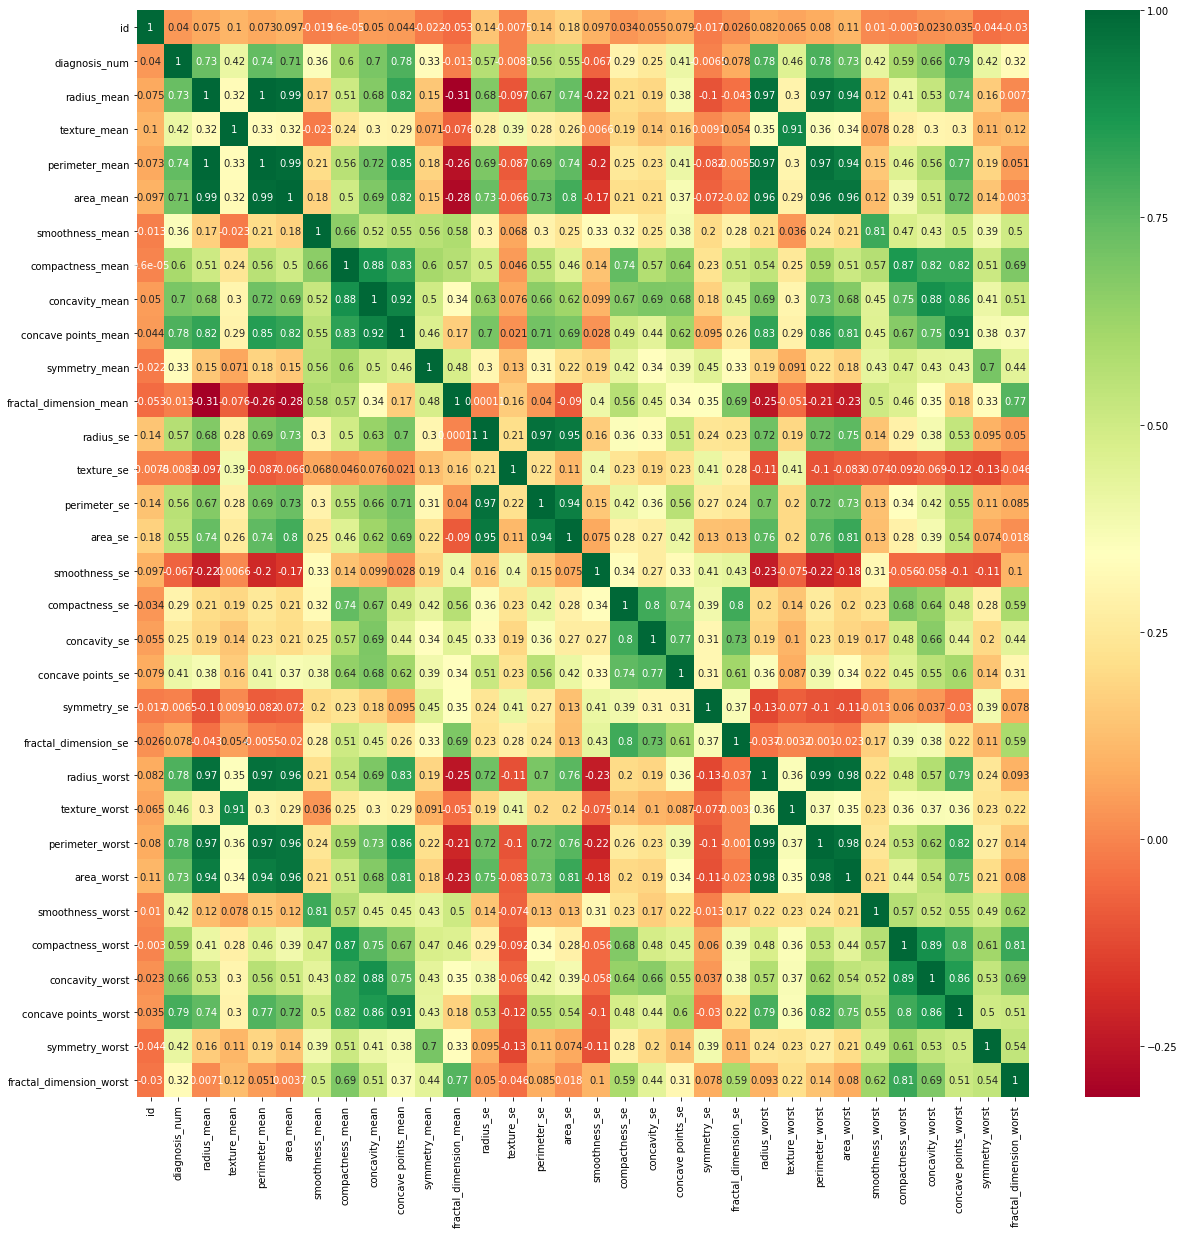

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = numeric_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(numeric_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Features that don't correlate: 
#ID, texture_mean, texture_se, smoothness_se, fractal_dimension_se, fractal_dimension_mean 

In [33]:
#Visualizing Data from Top Features
top = featureScores.nlargest(10,'Score')
top

,Feature,Score
28,concave points_worst,964.385393
23,perimeter_worst,897.944219
8,concave points_mean,861.676020
21,radius_worst,860.781707
3,perimeter_mean,697.235272
24,area_worst,661.600206
1,radius_mean,646.981021
4,area_mean,573.060747
7,concavity_mean,533.793126
27,concavity_worst,436.691939


Text(0, 0.5, 'Frequency')

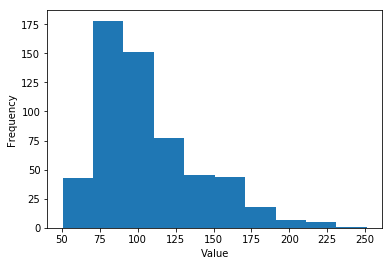

In [14]:
# Data and Feature Exploration

plt.hist(numeric_df['perimeter_worst'])
plt.xlabel("Value")
plt.ylabel("Frequency")

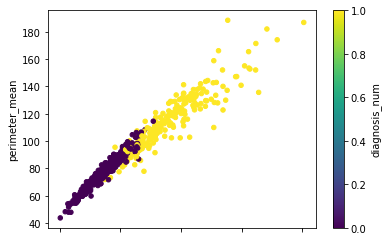

In [15]:
ax1 = numeric_df.plot.scatter(x='perimeter_worst',
                      y='perimeter_mean',
                      c='diagnosis_num',
                      colormap='viridis')

Text(0, 0.5, 'Frequency')

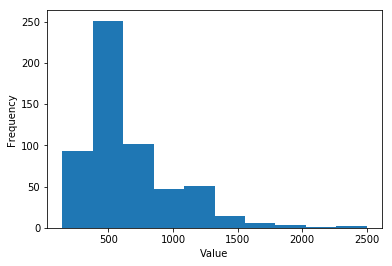

In [16]:
plt.hist(numeric_df['area_mean'])
plt.xlabel("Value")
plt.ylabel("Frequency")

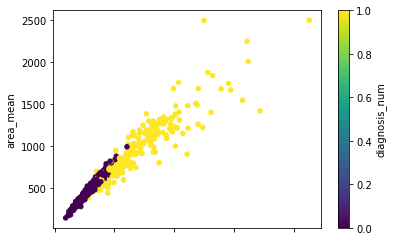

In [17]:
ax2 = numeric_df.plot.scatter(x='area_worst',
                      y='area_mean',
                      c='diagnosis_num',
                      colormap='viridis')

Text(0, 0.5, 'Frequency')

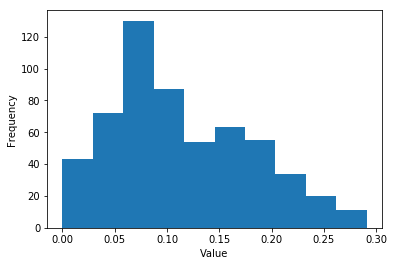

In [18]:
plt.hist(numeric_df['concave points_worst'])
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

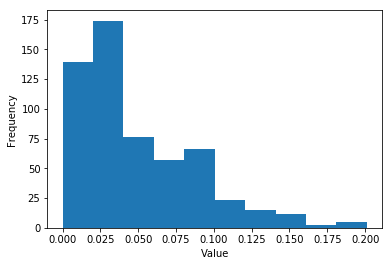

In [19]:
plt.hist(numeric_df['concave points_mean'])
plt.xlabel("Value")
plt.ylabel("Frequency")

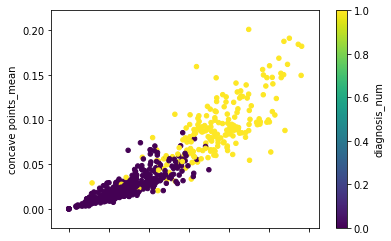

In [20]:
ax3 = numeric_df.plot.scatter(x='concave points_worst',
                      y='concave points_mean',
                      c='diagnosis_num',
                      colormap='viridis')

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

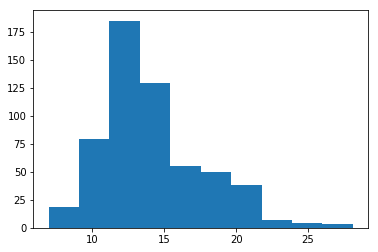

In [21]:
plt.hist(numeric_df['radius_mean'])

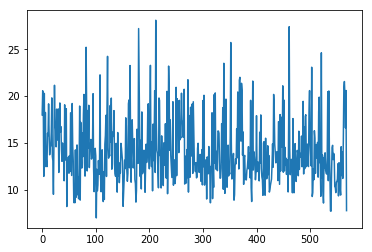

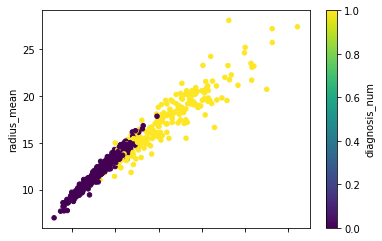

In [22]:
plt.plot(numeric_df['radius_mean'])

ax4 = numeric_df.plot.scatter(x='radius_worst',
                      y='radius_mean',
                      c='diagnosis_num',
                      colormap='viridis')

Text(0, 0.5, 'Frequency')

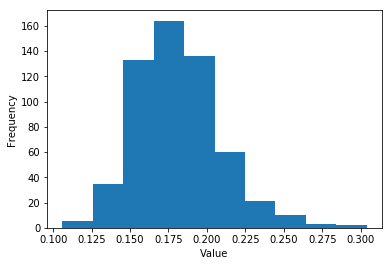

In [23]:
plt.hist(numeric_data['symmetry_mean'])
plt.xlabel("Value")
plt.ylabel("Frequency")

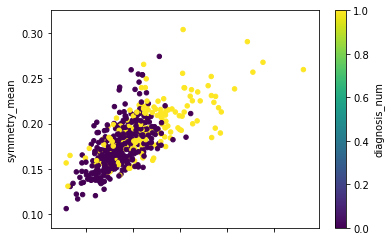

In [24]:
ax5 = numeric_df.plot.scatter(x='symmetry_worst',
                      y='symmetry_mean',
                      c='diagnosis_num',
                      colormap='viridis')

In [25]:
index = list(numeric_df.index)

In [26]:
x = np.arange(len(numeric_df))
xs = pd.Series(x)

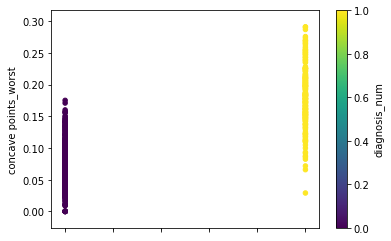

In [27]:
cpw = numeric_df.plot.scatter(x='diagnosis_num',
                      y='concave points_worst',
                      c='diagnosis_num',
                      colormap='viridis')

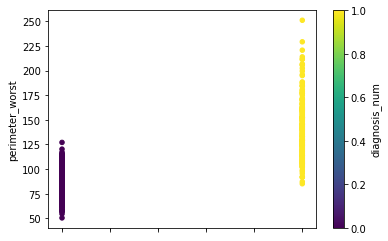

In [29]:
pw = numeric_df.plot.scatter(x='diagnosis_num',
                      y='perimeter_worst',
                      c='diagnosis_num',
                      colormap='viridis')

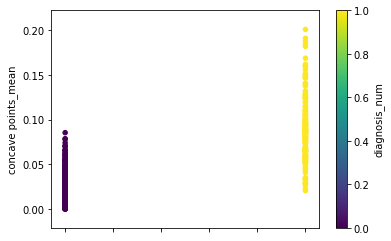

In [30]:
cpm = numeric_df.plot.scatter(x='diagnosis_num',
                      y='concave points_mean',
                      c='diagnosis_num',
                      colormap='viridis')